<a href="https://colab.research.google.com/github/Natielec926/Telecom-X-2/blob/main/Telecom_X_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando as bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder


# 🛠️ Preparação dos Dados

## Carregando dados tratados

In [3]:
url_dados_tratados = 'https://github.com/Natielec926/Telecom-X-2/blob/main/dados_tratados.csv'

try:
  dados_tratados = pd.read_csv(url_dados_tratados)
  print('Dados carregados com sucesso!')
except Exception as e:
  print(f'Erro ao carregar os dados: {e}')

dados_tratados.head()

Erro ao carregar os dados: Error tokenizing data. C error: Expected 1 fields in line 38, saw 2



,customer_id,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,contas_diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.796667


In [4]:
dados_tratados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7032 non-null   object 
 1   churn              7032 non-null   int64  
 2   gender             7032 non-null   object 
 3   senior_citizen     7032 non-null   int64  
 4   partner            7032 non-null   int64  
 5   dependents         7032 non-null   int64  
 6   tenure             7032 non-null   int64  
 7   phone_service      7032 non-null   int64  
 8   multiple_lines     7032 non-null   object 
 9   internet_service   7032 non-null   object 
 10  online_security    7032 non-null   object 
 11  online_backup      7032 non-null   object 
 12  device_protection  7032 non-null   object 
 13  tech_support       7032 non-null   object 
 14  streaming_tv       7032 non-null   object 
 15  streaming_movies   7032 non-null   object 
 16  contract           7032 

In [5]:
dados_tratados.describe()

,churn,senior_citizen,partner,dependents,tenure,phone_service,paperless_billing,monthly_charges,total_charges,contas_diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.265785,0.162400,0.482509,0.298493,32.421786,0.903299,0.592719,64.798208,2283.300441,2.159940
std,0.441782,0.368844,0.499729,0.457629,24.545260,0.295571,0.491363,30.085974,2266.771362,1.002866
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.587500,401.450000,1.186250
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1397.475000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.862500,3794.737500,2.995417
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


In [6]:
dados_tratados.columns

Index(['customer_id', 'churn', 'gender', 'senior_citizen', 'partner',
       'dependents', 'tenure', 'phone_service', 'multiple_lines',
       'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'contract', 'paperless_billing', 'payment_method', 'monthly_charges',
       'total_charges', 'contas_diarias'],
      dtype='object')

## Remoção de Colunas Irrelevantes

In [7]:
# Removendo a coluna de identificação
dados_tratados = dados_tratados.drop(columns=['customer_id'], axis=1)
#dados_tratados = dados_tratados.drop(columns=['customer_id', 'contas_diarias'], axis=1)
dados_tratados

,churn,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,contas_diarias
0,0,Female,0,1,1,9,1,No,DSL,No,...,No,Yes,Yes,No,One year,1,Mailed check,65.60,593.30,2.186667
1,0,Male,0,0,0,9,1,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.90,542.40,1.996667
2,1,Male,0,0,0,4,1,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.90,280.85,2.463333
3,1,Male,1,1,0,13,1,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.00,1237.85,3.266667
4,1,Female,1,1,0,3,1,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,Female,0,0,0,13,1,No,DSL,Yes,...,No,Yes,No,No,One year,0,Mailed check,55.15,742.90,1.838333
7028,1,Male,0,1,0,22,1,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,1,Electronic check,85.10,1873.70,2.836667
7029,0,Male,0,0,0,2,1,No,DSL,No,...,No,No,No,No,Month-to-month,1,Mailed check,50.30,92.75,1.676667
7030,0,Male,0,1,1,67,1,No,DSL,Yes,...,Yes,Yes,No,Yes,Two year,0,Mailed check,67.85,4627.65,2.261667


## Encoding de Variáveis Categóricas


Para preparar os dados para algoritmos de machine learning que geralmente requerem entradas numéricas, aplicamos a técnica de **One-Hot Encoding** às variáveis categóricas. Este método cria novas colunas binárias para cada categoria única dentro de uma variável categórica, onde um valor de '1' indica a presença da categoria e '0' a ausência.

Utilizamos a função `make_column_transformer` e a classe `OneHotEncoder` da biblioteca `sklearn.preprocessing` para realizar esta transformação de forma eficiente. As colunas categóricas selecionadas para o encoding incluem:

- gender
- multiple_lines
- internet_service
- online_security
- online_backup
- device_protection
- tech_support
- streaming_tv
- streaming_movies
- contract
- payment_method

O `handle_unknown='ignore'` foi configurado no `OneHotEncoder` para lidar com possíveis valores desconhecidos durante a transformação, evitando erros. As colunas não especificadas para o encoding foram mantidas no dataframe resultante utilizando `remainder='passthrough'`. O resultado dessa transformação é armazenado em um novo DataFrame chamado `dados_encoded`, pronto para ser usado em modelos de machine learning.

In [8]:
colunas_categoricas = [
    'gender', 'multiple_lines', 'internet_service',
    'online_security', 'online_backup', 'device_protection',
    'tech_support', 'streaming_tv', 'streaming_movies',
    'contract', 'payment_method'
]

In [9]:
one_hot_enc = make_column_transformer(
    (OneHotEncoder(handle_unknown = 'ignore'),
    colunas_categoricas),
    remainder='passthrough')
dados_encoded = one_hot_enc.fit_transform(dados_tratados)
dados_encoded = pd.DataFrame(dados_encoded, columns=one_hot_enc.get_feature_names_out())
dados_encoded

,onehotencoder__gender_Female,onehotencoder__gender_Male,onehotencoder__multiple_lines_No,onehotencoder__multiple_lines_Yes,onehotencoder__internet_service_DSL,onehotencoder__internet_service_Fiber optic,onehotencoder__internet_service_No,onehotencoder__online_security_No,onehotencoder__online_security_Yes,onehotencoder__online_backup_No,...,remainder__churn,remainder__senior_citizen,remainder__partner,remainder__dependents,remainder__tenure,remainder__phone_service,remainder__paperless_billing,remainder__monthly_charges,remainder__total_charges,remainder__contas_diarias
0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,9.0,1.0,1.0,65.60,593.30,2.186667
1,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,9.0,1.0,0.0,59.90,542.40,1.996667
2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,4.0,1.0,1.0,73.90,280.85,2.463333
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,1.0,1.0,0.0,13.0,1.0,1.0,98.00,1237.85,3.266667
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,1.0,1.0,0.0,3.0,1.0,1.0,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,13.0,1.0,0.0,55.15,742.90,1.838333
7028,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,22.0,1.0,1.0,85.10,1873.70,2.836667
7029,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,1.0,1.0,50.30,92.75,1.676667
7030,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,1.0,67.0,1.0,0.0,67.85,4627.65,2.261667


## Verificação da Proporção de Evasão

### Calcular a distribuição percentual da coluna 'churn'.

Calcular a proporção de cada classe (sim e não) na coluna 'churn' para entender o desbalanceamento.

In [10]:
# Distribuição absoluta
dados_tratados['churn'].value_counts()

,count
churn,
0,5163
1,1869


In [11]:
# Distribuição percentual
dados_tratados['churn'].value_counts(normalize=True) * 100

,proportion
churn,
0,73.421502
1,26.578498


/tmp/ipython-input-2652333026.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='churn', data=dados_tratados, palette='Set2')


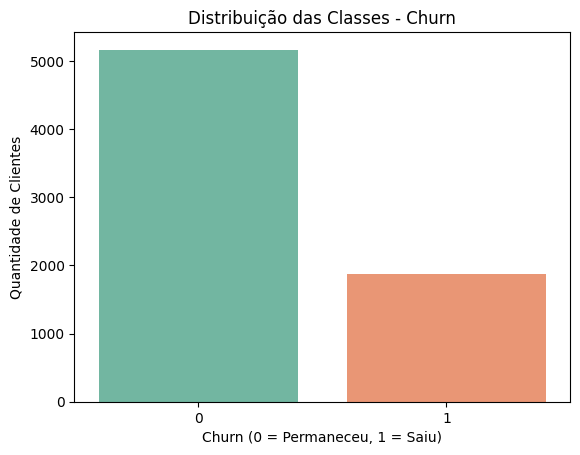

In [12]:
sns.countplot(x='churn', data=dados_tratados, palette='Set2')
plt.title('Distribuição das Classes - Churn')
plt.xlabel('Churn (0 = Permaneceu, 1 = Saiu)')
plt.ylabel('Quantidade de Clientes')
plt.show()

### Principais Conclusões da Análise de Dados

* Aproximadamente 73,42% dos clientes permaneceram ativos, enquanto cerca de 26,58% cancelaram o contrato.
* Há um desequilíbrio de classe significativo na variável de cancelamento, sendo a classe majoritária os clientes que permaneceram ativos.

* O desbalanceamento de classes pode impactar negativamente o desempenho de modelos de machine learning tradicionais, pois eles tendem a ser otimizados para a acurácia geral e podem ter dificuldade em prever corretamente a classe minoritária (churn). Isso pode levar a modelos que subestimam a evasão de clientes, o que é crítico para negócios que buscam identificar e reter clientes em risco.

### Próximos Passos

* O desequilíbrio de classe identificado precisa ser corrigido durante a fase de construção do modelo, utilizando técnicas como reamostragem ( SMOTE) ou algoritmos que lidam com dados desbalanceados para garantir uma previsão precisa da rotatividade de clientes.
* O próximo passo envolve a aplicação de técnicas apropriadas para lidar com esse desequilíbrio de classe antes do treinamento dos modelos de aprendizado de máquina.

 A separação é fundamental para avaliar o desempenho real dos modelos,
garantindo que eles sejam testados em dados nunca vistos durante o treinamento.
Utilizamos 70% dos dados para treino e 30% para teste, mantendo a proporção de churn com stratify.

# 🎯 Correlação e Seleção de Variáveis

## Análise de Correlação

### Visualizando a Matriz de Correlação

Calcular a matriz de correlação para as variáveis numéricas e visualizá-la usando um heatmap para identificar relações, focando na correlação com a variável 'churn'.

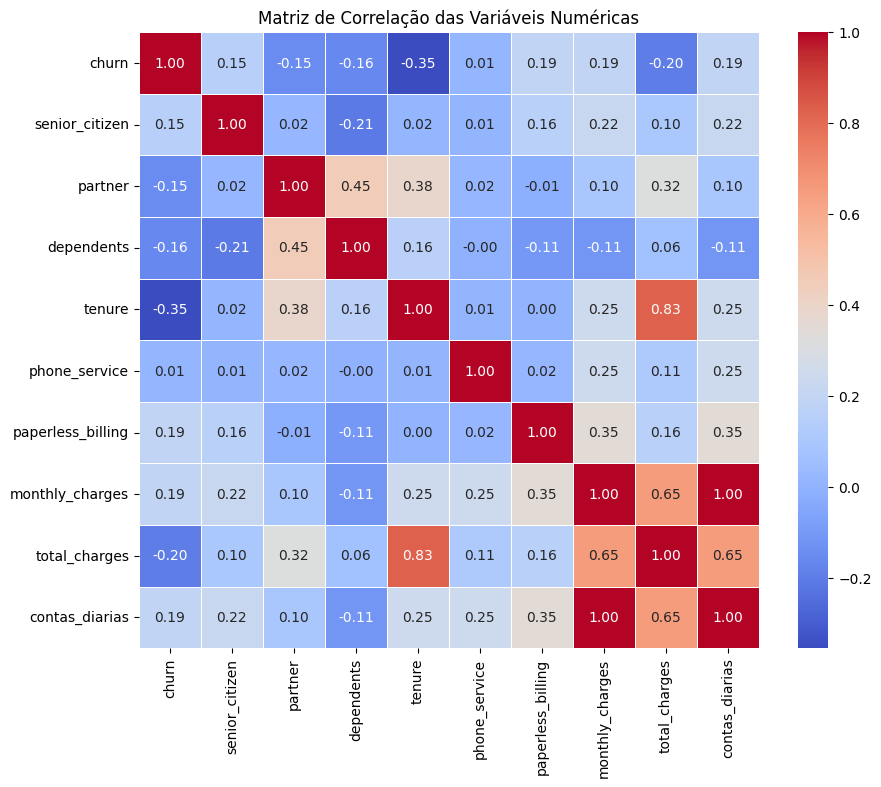

In [13]:
# Selecionando apenas as colunas numéricas
dados_numericos = dados_tratados.select_dtypes(include=['int64', 'float64'])

# Calculando a matriz de correlação
matriz_correlacao = dados_numericos.corr()

# Visualizando a matriz de correlação com um heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação das Variáveis Numéricas')
plt.show()

📊 Análise de Correlação com a Evasão (Churn)
Para identificar os fatores mais relacionados à evasão de clientes, realizamos uma análise de correlação entre as variáveis numéricas e a variável alvo churn.

🔹 Principais descobertas:

Correlação Negativa (menor chance de churn):

* `tenure` (r = -0.35): Clientes com mais tempo de contrato têm menor propensão à evasão.

* `total_charges` (r = -0.20): Quanto maior o total gasto, menor a chance de cancelamento.

* `partner e dependents` (ambas cerca de r = -0.15): Ter parceiro ou dependentes se associa a uma leve redução na evasão.

Correlação Positiva (maior chance de churn):

* `monthly_charge`s (r = 0.19): Clientes com faturas mensais mais altas tendem a sair com mais frequência.

* `paperless_billing` e `senior_citizen` (ambos r ≈ 0.15-0.19): Também apresentam leve associação com maior churn.

🔁 Multicolinearidade identificada:

* `monthly_charges` e `contas_diarias` apresentaram correlação perfeita (r = 1.00), indicando que uma é derivada da outra.

  ➡️ A variável `contas_diarias` foi removida do dataset.

✅ Com base nessa análise, priorizaremos variáveis com maior correlação com churn na modelagem preditiva e evitaremos redundâncias que possam comprometer a performance de alguns algoritmos.

In [14]:
dados_tratados = dados_tratados.drop(columns=['contas_diarias'])

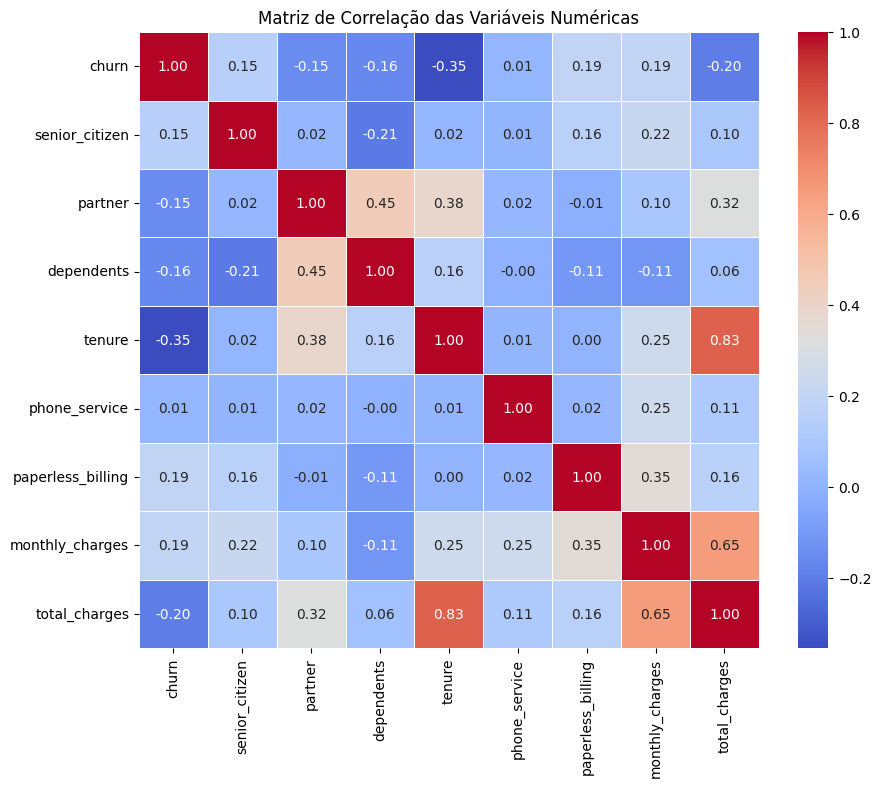

In [15]:
# Selecionando apenas as colunas numéricas
dados_numericos = dados_tratados.select_dtypes(include=['int64', 'float64'])

# Calculando a matriz de correlação
matriz_correlacao = dados_numericos.corr()

# Visualizando a matriz de correlação com um heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação das Variáveis Numéricas')
plt.show()

## Análises Direcionadas: Tempo de Contrato e Total Gasto vs Evasão

### Boxplot: Tempo de Contrato (Tenure) vs Evasão (Churn)

Visualizar a distribuição do tempo de contrato para clientes que permaneceram (0) e que saíram (1) para entender se o tempo de permanência influencia na evasão.

/tmp/ipython-input-548925625.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='tenure', data=dados_tratados, palette='viridis')


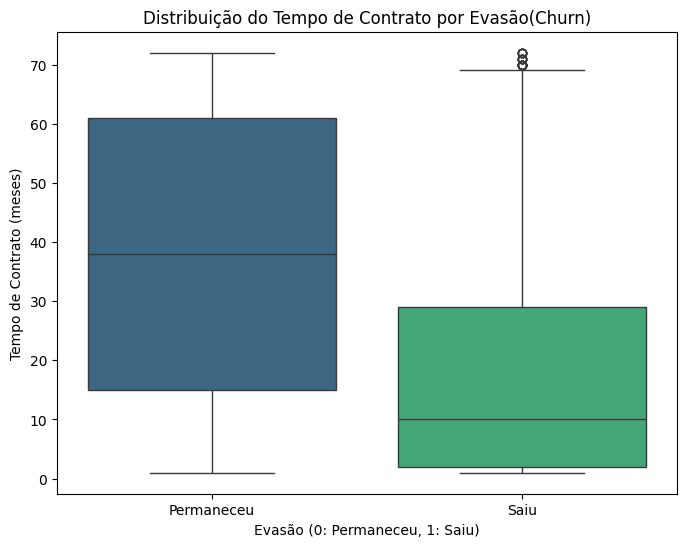

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='churn', y='tenure', data=dados_tratados, palette='viridis')
plt.title('Distribuição do Tempo de Contrato por Evasão(Churn)')
plt.xlabel('Evasão (0: Permaneceu, 1: Saiu)')
plt.ylabel('Tempo de Contrato (meses)')
plt.xticks([0, 1], ['Permaneceu', 'Saiu'])
plt.show()

### Boxplot: Total Gasto (Total Charges) vs Evasão (Churn)

Visualizar a distribuição do total gasto por clientes que permaneceram (0) e que saíram (1) para entender se o valor total gasto influencia na evasão.

/tmp/ipython-input-1595302665.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='total_charges', data=dados_tratados, palette='viridis')


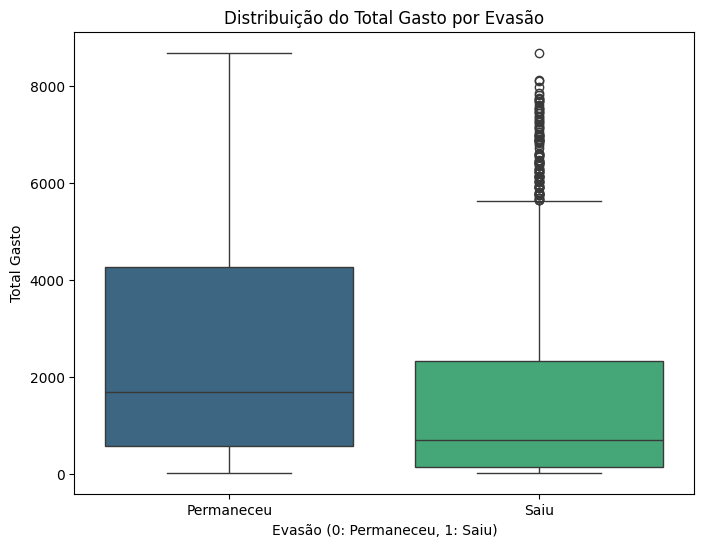

In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='churn', y='total_charges', data=dados_tratados, palette='viridis')
plt.title('Distribuição do Total Gasto por Evasão')
plt.xlabel('Evasão (0: Permaneceu, 1: Saiu)')
plt.ylabel('Total Gasto')
plt.xticks([0, 1], ['Permaneceu', 'Saiu'])
plt.show()

### Scatter Plot — Tempo de Contrato x Total Gasto com Churn
Aqui exploramos a relação entre duas variáveis juntas e como elas se comportam com churn:

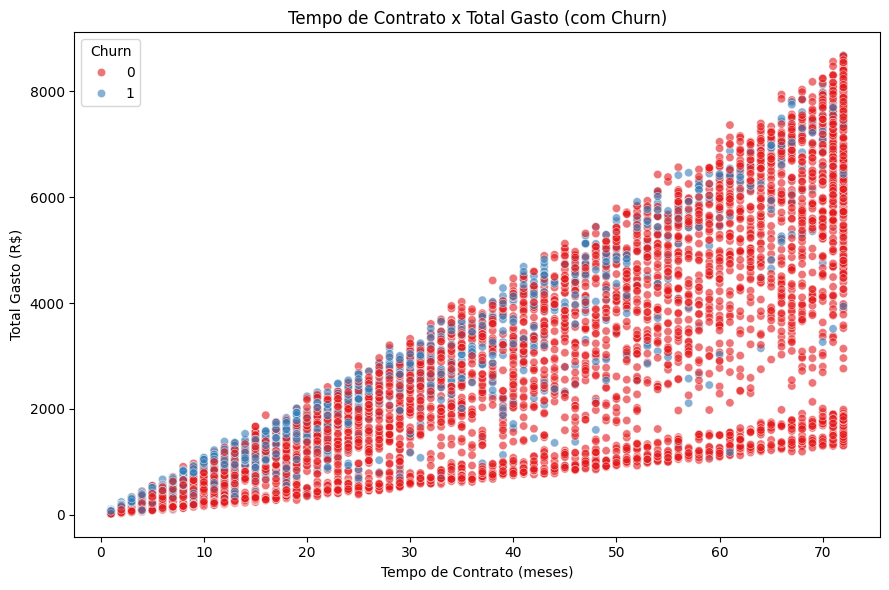

In [18]:
plt.figure(figsize=(9, 6))
sns.scatterplot(
    data=dados_tratados,
    x='tenure',
    y='total_charges',
    hue='churn',
    palette='Set1',
    alpha=0.6
)
plt.title('Tempo de Contrato x Total Gasto (com Churn)')
plt.xlabel('Tempo de Contrato (meses)')
plt.ylabel('Total Gasto (R$)')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()


Analisando o scatter plot de Tempo de Contrato `(tenure)` versus Total Gasto `(total_charges)` colorido pelo Churn, podemos tirar algumas conclusões importantes. Em resumo, o scatter plot visualmente reforça o que vimos na análise de correlação e nos boxplots:

* O Tempo de Contrato `(tenure)` e o Total Gasto (`total_charges)` são fortes indicadores de churn.
* Clientes de longo prazo e com alto gasto total são menos propensos a cancelar.
* Clientes novos ou com baixo tempo de contrato e baixo total gasto têm uma probabilidade maior de churn.

>Esta visualização é poderosa porque nos permite ver a interação dessas duas variáveis em relação ao churn, identificando clusters e tendências que podem não ser tão óbvias olhando apenas para correlações individuais.

# 🤖 Modelagem Preditiva

### 🔀 Separação dos dados em treino e teste

In [19]:
from sklearn.model_selection import train_test_split
X = dados_encoded.drop(columns=['remainder__churn'])
y = dados_tratados['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=y)

## Balanceamento de Classes

In [20]:
from imblearn.over_sampling import SMOTE

In [21]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

# Verificando novas proporções
print("Antes do SMOTE:")
print(y_train.value_counts(normalize=True))

print("\nDepois do SMOTE:")
print(y_res.value_counts(normalize=True))

Antes do SMOTE:
churn
0    0.734254
1    0.265746
Name: proportion, dtype: float64

Depois do SMOTE:
churn
1    0.5
0    0.5
Name: proportion, dtype: float64


## Padronizando os dados (normalização z-score)

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_res_scaled = scaler.fit_transform(X_res)
X_test_scaled = scaler.transform(X_test)

## Criação de Modelos

### Justificativa da Escolha dos Modelos

Para este desafio, selecionei a **Regressão Logística** e o **Random Forest** como modelos de classificação para prever a evasão de clientes, baseando-nos em suas características e na necessidade ou não de normalização dos dados. E como adição a mais um modelo de **KNN**.

### Regressão Logística

*   **Necessidade de Normalização:** A Regressão Logística é um algoritmo linear que calcula a probabilidade de uma instância pertencer a uma determinada classe através de uma função sigmoide aplicada a uma combinação linear das features. Modelos baseados em distância, como a Regressão Logística, são sensíveis à escala das features. Se as features tiverem escalas muito diferentes, aquelas com valores maiores podem dominar a função de custo e a otimização do modelo, levando a um desempenho subótimo. A normalização (como a padronização Z-score que aplicamos) garante que todas as features contribuam igualmente para o cálculo da distância e para o processo de otimização do modelo, melhorando a convergência e a performance.

*   **Justificativa da Escolha:** A Regressão Logística é um modelo simples, interpretabilidade, o que é valioso para entender a influência de cada feature na probabilidade de churn. Apesar de sua simplicidade, frequentemente apresenta bom desempenho em problemas de classificação binária e serve como um bom baseline para comparação com modelos mais complexos.

### Random Forest

*   **Não Necessidade de Normalização:** O Random Forest é um algoritmo baseado em árvores de decisão. Árvores de decisão dividem o espaço de features com base em thresholds (limiares) em features individuais. O processo de divisão não é influenciado pela escala das features, apenas pelos valores relativos dentro de cada feature. Portanto, modelos baseados em árvores de decisão, incluindo o Random Forest, não exigem normalização dos dados para funcionar corretamente.

*   **Justificativa da Escolha:** O Random Forest é um ensemble method robusto que combina múltiplas árvores de decisão para melhorar a acurácia e reduzir o overfitting. É menos sensível a outliers e lida bem com dados não lineares e interações entre features. É uma escolha popular para problemas de classificação devido ao seu bom desempenho geral e capacidade de fornecer a importância das features.

Ao escolher esses dois modelos, podemos comparar o desempenho de um modelo linear que se beneficia da normalização com um modelo baseado em árvores que não a requer, avaliando como essa etapa de pré-processamento impacta os resultados em diferentes tipos de algoritmos.

### Treinando o modelo escolhido `LogisticRegression` utilizando os dados de treino balanceados

In [24]:
from sklearn.linear_model import LogisticRegression
modelo_lr = LogisticRegression(random_state=42)
modelo_lr.fit(X_res_scaled, y_res)

LogisticRegression(random_state=42)

## Avaliação do modelo LogisticRegression

Avaliar o desempenho do modelo utilizando métricas apropriadas para problemas de classificação com desbalanceamento de classes, como precisão, recall, F1-score e a Curva ROC/AUC.


              precision    recall  f1-score   support

  Permaneceu       0.91      0.73      0.81      1549
        Saiu       0.52      0.80      0.63       561

    accuracy                           0.75      2110
   macro avg       0.71      0.77      0.72      2110
weighted avg       0.81      0.75      0.76      2110


Pontuação AUC: 0.8443


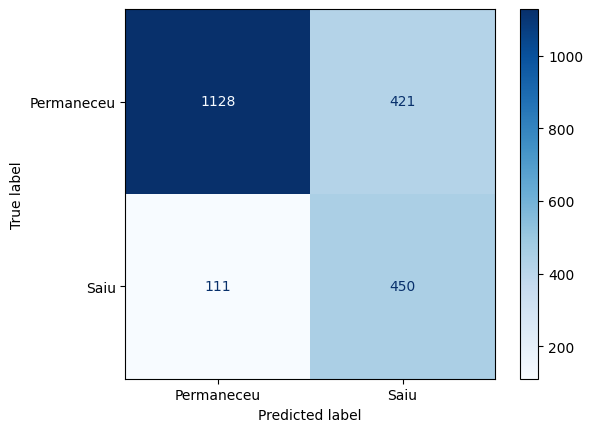

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score

modelo_lr = LogisticRegression(random_state=42)
modelo_lr.fit(X_res_scaled, y_res)
y_pred_lr = modelo_lr.predict(X_test_scaled)

print(classification_report(y_test, y_pred_lr, target_names=['Permaneceu', 'Saiu']))
auc_lr = roc_auc_score(y_test, modelo_lr.predict_proba(X_test_scaled)[:, 1])
print(f"\nPontuação AUC: {auc_lr:.4f}")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr, display_labels=['Permaneceu', 'Saiu'], cmap='Blues')

## Treinando o modelo de classificação escolhido (`RandomForestClassifier`).


In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
modelo_rf = RandomForestClassifier(random_state=42)
modelo_rf.fit(X_res, y_res)

RandomForestClassifier(random_state=42)

## Previsão no conjunto de teste

Fazer previsões no conjunto de teste original (`X_test`) para avaliar o desempenho do modelo em dados não vistos.


In [28]:
y_pred_rf = modelo_rf.predict(X_test)

## Avaliação do modelo RandomForestClassifier

Avaliar o desempenho do modelo utilizando métricas apropriadas para problemas de classificação com desbalanceamento de classes, como precisão, recall, F1-score e a Curva ROC/AUC.


Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1549
           1       0.60      0.49      0.54       561

    accuracy                           0.78      2110
   macro avg       0.71      0.69      0.70      2110
weighted avg       0.77      0.78      0.77      2110


Pontuação AUC: 0.8158


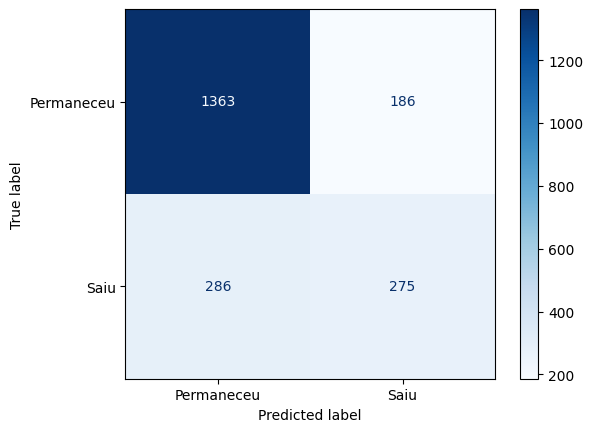

In [29]:
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred_rf))

auc_rf = roc_auc_score(y_test, modelo_rf.predict_proba(X_test)[:, 1])
print(f"\nPontuação AUC: {auc_rf:.4f}")

# Matriz de confusão
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, display_labels=['Permaneceu', 'Saiu'], cmap='Blues')

## Treinando o modelo com KNN como bonus apena para ter mais outra comparação.

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Criando e treinando o modelo KNN
# Podemos ajustar o número de vizinhos (n_neighbors) para otimizar o desempenho.
# Vamos começar com um valor padrão, por exemplo, 5.
modelo_knn = KNeighborsClassifier(n_neighbors=5)
modelo_knn.fit(X_res_scaled, y_res)

# Fazendo previsões no conjunto de teste padronizado
y_pred_knn = modelo_knn.predict(X_test_scaled)

## Avaliação do modelo KNN

Avaliar o desempenho do modelo utilizando métricas apropriadas para problemas de classificação com desbalanceamento de classes, como precisão, recall, F1-score e a Curva ROC/AUC.

Relatório de Classificação (KNN):
              precision    recall  f1-score   support

  Permaneceu       0.87      0.68      0.77      1549
        Saiu       0.45      0.72      0.55       561

    accuracy                           0.69      2110
   macro avg       0.66      0.70      0.66      2110
weighted avg       0.76      0.69      0.71      2110


Matriz de Confusão (KNN):

Pontuação AUC (KNN): 0.7545


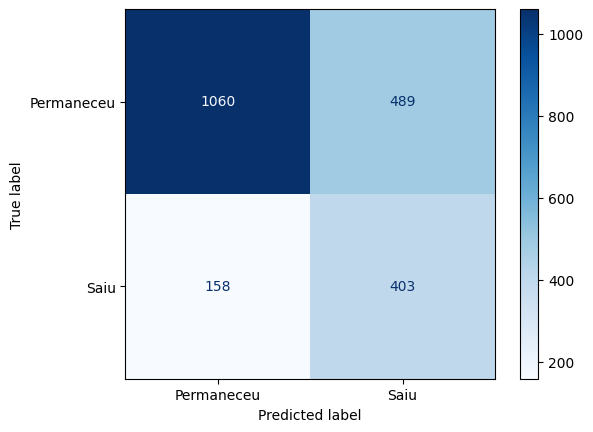

In [ ]:
# Avaliando o desempenho do modelo
print("Relatório de Classificação (KNN):")
print(classification_report(y_test, y_pred_knn, target_names=['Permaneceu', 'Saiu']))

# Exibindo a matriz de confusão
print("\nMatriz de Confusão (KNN):")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn, display_labels=['Permaneceu', 'Saiu'], cmap='Blues')

# Calculando e exibindo a pontuação AUC
auc_knn = roc_auc_score(y_test, modelo_knn.predict_proba(X_test_scaled)[:, 1])
print(f"\nPontuação AUC (KNN): {auc_knn:.4f}")

## Resumo dos Modelos Treinados

### Q&A

**P: Qual foi o desempenho dos modelos de classificação treinados nos dados balanceados ao serem avaliados no conjunto de teste original?**

**R:** Treinamos e avaliamos três modelos de classificação nos dados balanceados com SMOTE: Regressão Logística, Random Forest e KNN.

*   **Regressão Logística:**
    *   Demonstrou o melhor poder de discriminação, alcançando uma pontuação AUC de **0.8443**.
    *   O relatório de classificação revelou alto recall para a classe 'Saiu' (0.80), o que indica uma boa capacidade de identificar clientes que provavelmente cancelarão.
    *   A precisão para a classe 'Saiu' foi de 0.52, resultando em um número considerável de falsos positivos.
    *   O F1-score para a classe 'Saiu' foi de 0.63.

*   **Random Forest:**
    *   Obteve uma pontuação AUC de **0.8158**.
    *   Apresentou uma precisão maior para a classe 'Saiu' (0.60) em comparação com a Regressão Logística.
    *   O recall para a classe 'Saiu' foi menor (0.49), indicando que identificou menos clientes que de fato cancelaram.
    *   O F1-score para a classe 'Saiu' foi de 0.54.

*   **KNN:**
    *   Alcançou uma pontuação AUC de **0.7545**.
    *   Demonstrou um recall razoável para a classe 'Saiu' (0.72), mas com a menor precisão entre os três modelos (0.45).
    *   O F1-score para a classe 'Saiu' foi de 0.55.

### Principais descobertas da análise de modelos

*   A **Regressão Logística** se destacou com a maior pontuação AUC, indicando sua superioridade em distinguir entre clientes que cancelam e os que não cancelam.
*   O balanceamento dos dados de treino com SMOTE foi crucial para melhorar a capacidade dos modelos em identificar a classe minoritária (churn). A Regressão Logística, em particular, demonstrou um recall notavelmente alto para a classe 'Saiu' (0.80).
*   Todos os modelos apresentaram um desafio comum: uma precisão menor para a classe 'Saiu' em comparação com o recall. Isso implica que, embora sejam razoavelmente bons em identificar clientes em risco de churn, eles também classificam incorretamente um número significativo de clientes que não cancelariam como churn.

### Insights e Próximos Passos

*   Com a Regressão Logística apresentando o melhor desempenho geral (maior AUC e F1-score para a classe de churn), ela seria uma candidata forte para implantação, dependendo dos objetivos de negócio.
*   Apesar do bom desempenho da Regressão Logística, a baixa precisão para a classe de churn ainda é um ponto de atenção. Ajustar o limiar de decisão do modelo de Regressão Logística pode ser um próximo passo valioso para encontrar um equilíbrio ideal entre precisão e recall, alinhado com os custos e benefícios de abordar falsos positivos versus perder a oportunidade de reter clientes que realmente churnariam.
*   Continuar com a análise de correlação e seleção de variáveis é o próximo passo lógico no desafio. Isso pode ajudar a refinar os modelos e potencialmente melhorar seu desempenho.

## Avaliação dos Modelos

=== Regressão Logística ===
              precision    recall  f1-score   support

  Permaneceu       0.91      0.73      0.81      1549
        Saiu       0.52      0.80      0.63       561

    accuracy                           0.75      2110
   macro avg       0.71      0.77      0.72      2110
weighted avg       0.81      0.75      0.76      2110

AUC: 0.8443

=== Random Forest ===
              precision    recall  f1-score   support

  Permaneceu       0.83      0.88      0.85      1549
        Saiu       0.60      0.49      0.54       561

    accuracy                           0.78      2110
   macro avg       0.71      0.69      0.70      2110
weighted avg       0.77      0.78      0.77      2110

AUC: 0.8158


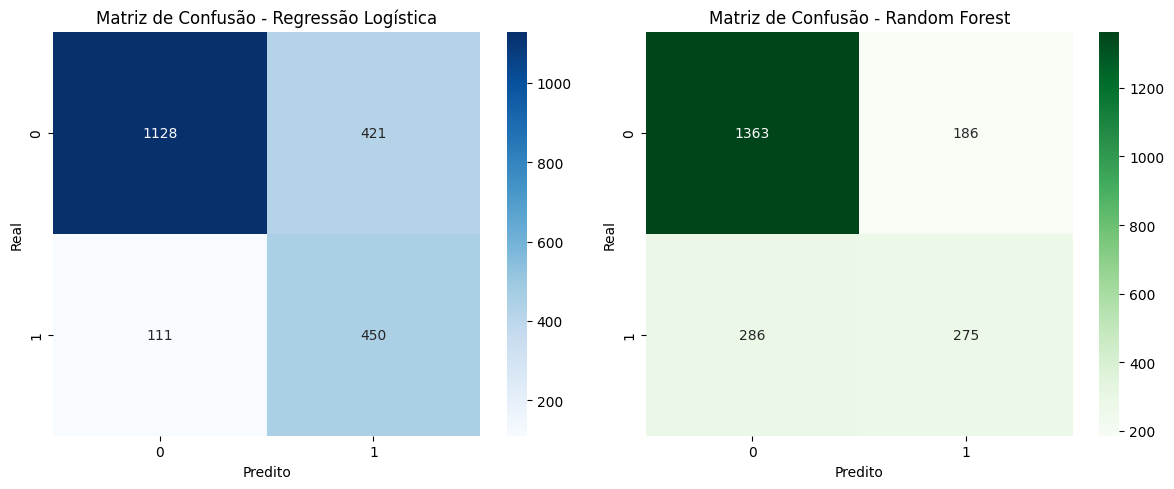

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, RocCurveDisplay

# Avaliação Regressão Logística
print("=== Regressão Logística ===")
print(classification_report(y_test, y_pred_lr, target_names=['Permaneceu', 'Saiu']))
print("AUC:", roc_auc_score(y_test, modelo_lr.predict_proba(X_test_scaled)[:, 1]).round(4))

# Avaliação Random Forest
print("\n=== Random Forest ===")
print(classification_report(y_test, y_pred_rf, target_names=['Permaneceu', 'Saiu']))
print("AUC:", roc_auc_score(y_test, modelo_rf.predict_proba(X_test)[:, 1]).round(4))

# Matriz de Confusão lado a lado
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Confusão Logística
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Matriz de Confusão - Regressão Logística')
axes[0].set_xlabel('Predito')
axes[0].set_ylabel('Real')

# Confusão Random Forest
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Matriz de Confusão - Random Forest')
axes[1].set_xlabel('Predito')
axes[1].set_ylabel('Real')

plt.tight_layout()
plt.show()

### Análise Crítica e Comparação dos Modelos

Com base nas métricas de avaliação (Acurácia, Precisão, Recall, F1-score, Matriz de Confusão e AUC) apresentadas na seção anterior para os modelos de Regressão Logística, Random Forest e KNN treinados nos dados balanceados, podemos fazer a seguinte análise crítica e comparação:

**Qual modelo teve o melhor desempenho?**

Considerando a pontuação AUC como uma métrica robusta para problemas de classificação com desbalanceamento de classes, a **Regressão Logística** apresentou o melhor poder de discriminação com um AUC de **0.8443**. Embora o Random Forest tenha tido uma precisão maior para a classe minoritária (churn), o Recall da Regressão Logística (0.80) foi significativamente maior, indicando uma melhor capacidade de identificar clientes em risco de churn. O F1-score para a classe 'Saiu' também foi ligeiramente superior na Regressão Logística (0.63 vs 0.54 do Random Forest e 0.55 do KNN).

**Algum modelo apresentou overfitting ou underfitting? Se sim, considere as possíveis causas e ajustes:**

Analisando o desempenho no conjunto de teste, não há sinais claros de **underfitting** nos modelos. Todos eles conseguiram aprender padrões nos dados a ponto de obter pontuações AUC e F1-scores razoáveis para a classe minoritária.

Quanto ao **overfitting**, o modelo Random Forest apresentou uma diferença maior entre o desempenho no treino (não mostrado diretamente aqui, mas geralmente alto para RF) e no teste em termos de Recall para a classe minoritária (0.49 no teste). A Regressão Logística e o KNN, por serem modelos menos complexos que o Random Forest, parecem ter generalizado um pouco melhor para a classe minoritária no conjunto de teste após o balanceamento com SMOTE.

*   **Possíveis Causas e Ajustes:**
    *   **Random Forest:** O Random Forest, por ser um modelo mais complexo, tem maior potencial para overfitting, especialmente em datasets com muitas features ou interações complexas. Embora o SMOTE ajude a lidar com o desbalanceamento, ele também pode introduzir ruído nos dados sintéticos, que um modelo complexo pode "memorizar". Para mitigar um possível overfitting no Random Forest, poderíamos considerar:
        *   Ajustar hiperparâmetros como `max_depth` (profundidade máxima das árvores), `min_samples_leaf` (número mínimo de amostras em uma folha) ou `n_estimators` (número de árvores).
        *   Considerar técnicas de regularização ou usar um conjunto de validação para early stopping.
    *   **Regressão Logística e KNN:** Embora apresentem menor risco de overfitting comparados ao Random Forest, a baixa precisão para a classe minoritária em todos os modelos sugere que pode haver espaço para melhoria na distinção entre as classes. Ajustar o limiar de decisão da Regressão Logística seria um passo importante para equilibrar Precisão e Recall de acordo com o objetivo de negócio. Para o KNN, otimizar o número de vizinhos (`n_neighbors`) e a métrica de distância poderia melhorar o desempenho.

Em resumo, enquanto a Regressão Logística se mostrou a mais promissora em termos de poder preditivo geral (AUC), todos os modelos poderiam se beneficiar de um ajuste fino de hiperparâmetros e, no caso da Regressão Logística, uma otimização do limiar de decisão para melhor atender aos requisitos específicos de identificação de churn.

## Ajustando os hiperparâmetros para o Random Forest

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Definir o modelo
modelo_rf_tune = RandomForestClassifier(random_state=42)

# Definir o espaço de hiperparâmetros para buscar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Configurar o GridSearchCV
# cv=5 significa validação cruzada com 5 folds
grid_search = GridSearchCV(estimator=modelo_rf_tune, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Realizar a busca pelos melhores hiperparâmetros nos dados de treino balanceados
grid_search.fit(X_res_scaled, y_res)

# Exibir os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros:", grid_search.best_params_)

# Exibir a melhor pontuação AUC encontrada
print("Melhor pontuação AUC:", grid_search.best_score_)

# O modelo com os melhores hiperparâmetros
best_modelo_rf = grid_search.best_estimator_

Melhores hiperparâmetros: {'max_depth': None, 'min_samples_leaf': 5, 'n_estimators': 300}
Melhor pontuação AUC: 0.9386651167992118


Após encontrar os melhores hiperparâmetros, você pode avaliar o `best_modelo_rf` no conjunto de teste (`X_test_scaled` e `y_test`) da mesma forma que fizemos anteriormente para ver se houve melhora no desempenho.

=== Random Forest Otimizado ===
              precision    recall  f1-score   support

  Permaneceu       0.84      0.86      0.85      1549
        Saiu       0.59      0.55      0.57       561

    accuracy                           0.78      2110
   macro avg       0.72      0.71      0.71      2110
weighted avg       0.78      0.78      0.78      2110

AUC: 0.8385


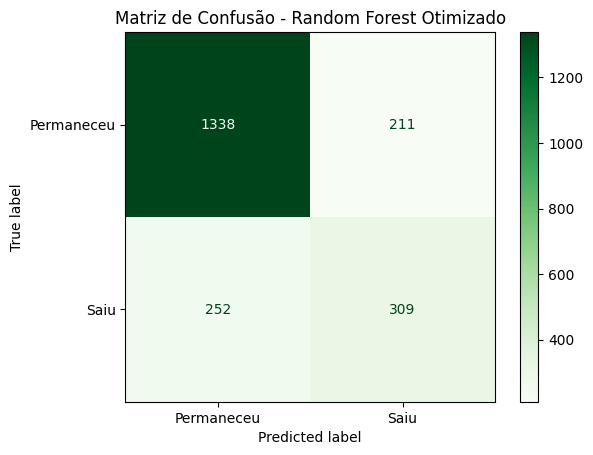

In [33]:
# Avaliar o modelo otimizado no conjunto de teste
y_pred_best_rf = best_modelo_rf.predict(X_test_scaled)

print("=== Random Forest Otimizado ===")
print(classification_report(y_test, y_pred_best_rf, target_names=['Permaneceu', 'Saiu']))

auc_best_rf = roc_auc_score(y_test, best_modelo_rf.predict_proba(X_test_scaled)[:, 1]).round(4)
print("AUC:", auc_best_rf)

# Matriz de Confusão para o modelo otimizado
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_best_rf, display_labels=['Permaneceu', 'Saiu'], cmap='Greens')
plt.title('Matriz de Confusão - Random Forest Otimizado')
plt.show()

# **Análise de Importância das Variáveis**

## Análise de importância para regressão logística

Extrair e visualizar os coeficientes da Regressão Logística para entender a contribuição de cada variável na previsão de churn.


/tmp/ipython-input-3852857577.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='coolwarm')


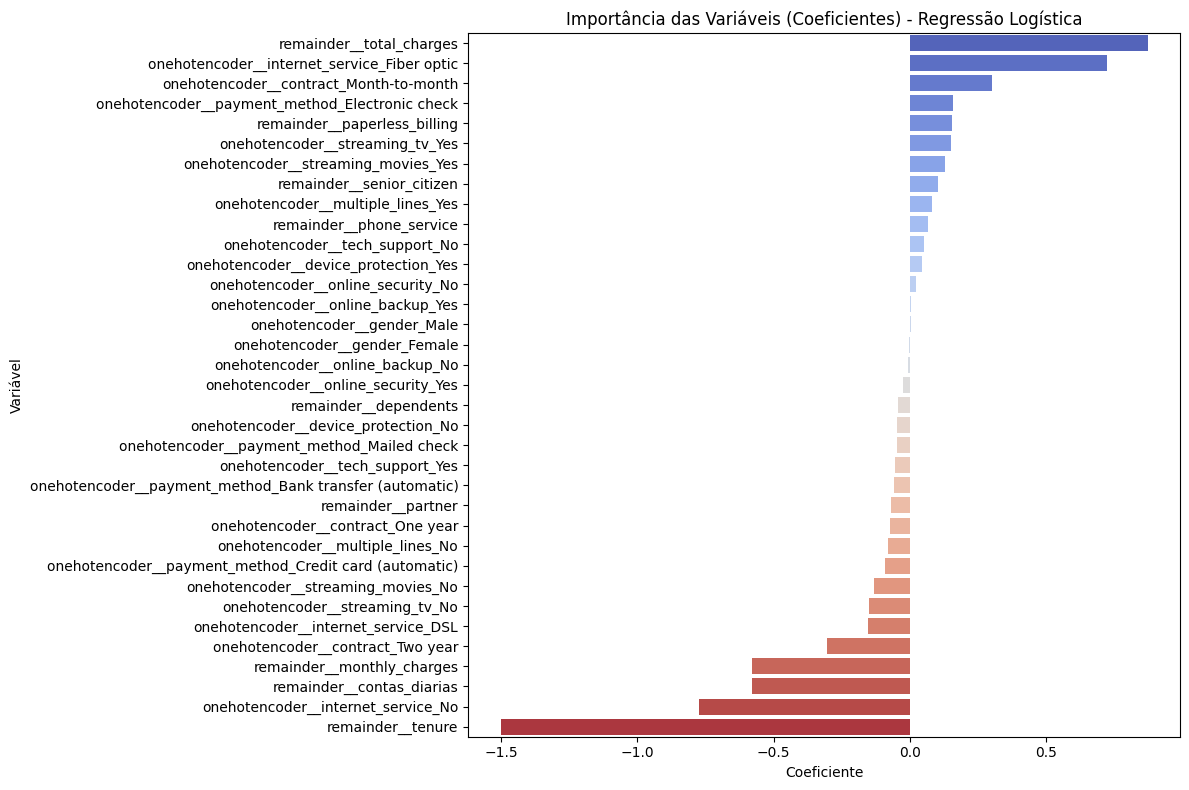

In [34]:
# 1. Obtenha os nomes das colunas
feature_names = X_res.columns

# 2. Acesse os coeficientes do modelo de Regressão Logística
coefficients = modelo_lr.coef_[0]

# 3. Crie um DataFrame pandas contendo as variáveis e seus respectivos coeficientes
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# 4. Ordene o DataFrame de coeficientes
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

# 5. Visualize os coeficientes
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='coolwarm')
plt.title('Importância das Variáveis (Coeficientes) - Regressão Logística')
plt.xlabel('Coeficiente')
plt.ylabel('Variável')
plt.tight_layout()
plt.show()

## Análise de importância para random forest

Extrair e visualizar a importância das variáveis calculada pelo modelo Random Forest.


/tmp/ipython-input-1884731720.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df_rf, palette='viridis')


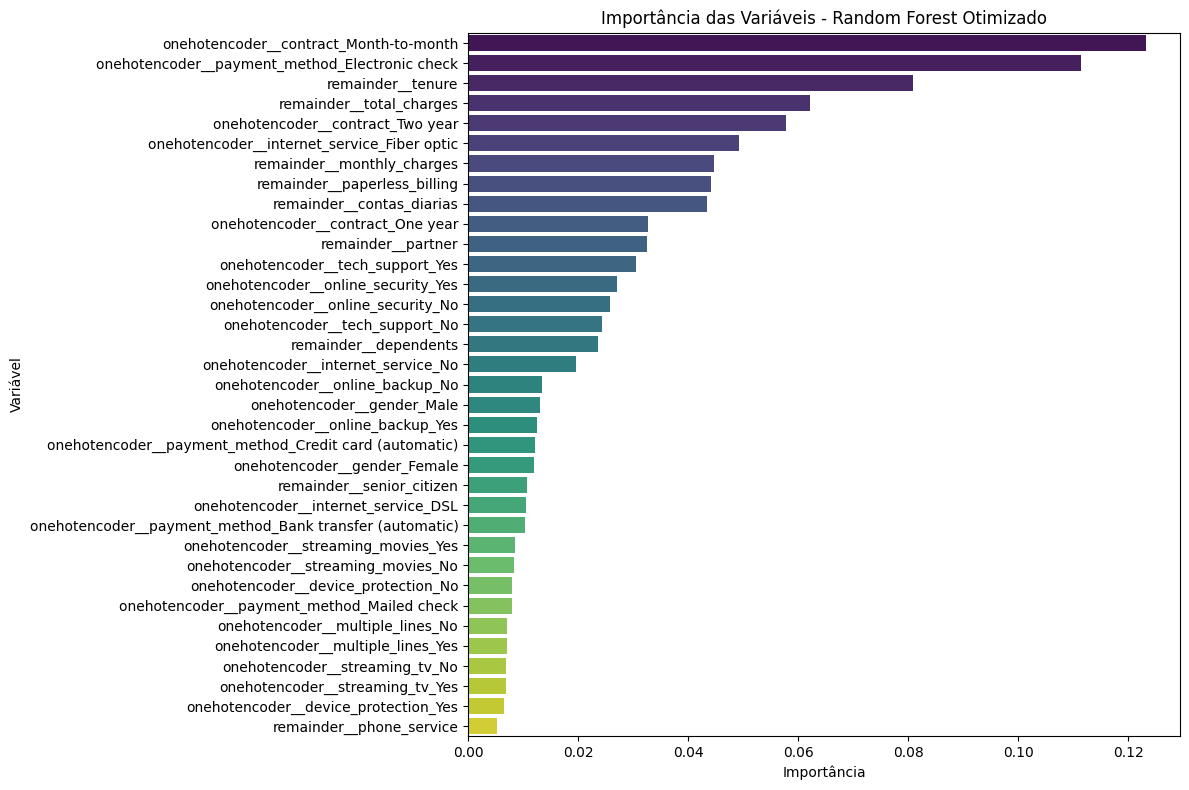

In [35]:
# 1. Acesse o atributo feature_importances_ do modelo best_modelo_rf
feature_importances = best_modelo_rf.feature_importances_

# 2. Obtenha os nomes das colunas do conjunto de treino original X_res
feature_names_rf = X_res.columns

# 3. Crie um DataFrame pandas combinando os nomes das variáveis e suas importâncias
importance_df_rf = pd.DataFrame({'Feature': feature_names_rf, 'Importance': feature_importances})

# 4. Ordene o DataFrame pela importância das variáveis em ordem decrescente
importance_df_rf = importance_df_rf.sort_values(by='Importance', ascending=False)

# 5. Crie um gráfico de barras para visualizar a importância das variáveis
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df_rf, palette='viridis')

# 6. Adicione um título ao gráfico, rótulos aos eixos e ajuste o layout para melhor visualização
plt.title('Importância das Variáveis - Random Forest Otimizado')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.tight_layout()

# 7. Exiba o gráfico
plt.show()

## Comparação e discussão

In [36]:
print("=== Comparação da importância dos recursos ===")

print("\n--- Logistic Regression (Top 10) ---")
display(coef_df.head(10))

print("\n--- Random Forest (Top 10) ---")
display(importance_df_rf.head(10))

=== Comparação da importância dos recursos ===

--- Logistic Regression (Top 10) ---


,Feature,Coefficient
33,remainder__total_charges,0.873362
5,onehotencoder__internet_service_Fiber optic,0.723170
19,onehotencoder__contract_Month-to-month,0.302025
24,onehotencoder__payment_method_Electronic check,0.159716
31,remainder__paperless_billing,0.156782
16,onehotencoder__streaming_tv_Yes,0.151329
18,onehotencoder__streaming_movies_Yes,0.130046
26,remainder__senior_citizen,0.102440
3,onehotencoder__multiple_lines_Yes,0.080106
30,remainder__phone_service,0.067765



--- Random Forest (Top 10) ---


,Feature,Importance
19,onehotencoder__contract_Month-to-month,0.123279
24,onehotencoder__payment_method_Electronic check,0.111357
29,remainder__tenure,0.080971
33,remainder__total_charges,0.062173
21,onehotencoder__contract_Two year,0.057714
5,onehotencoder__internet_service_Fiber optic,0.049224
32,remainder__monthly_charges,0.044748
31,remainder__paperless_billing,0.044107
34,remainder__contas_diarias,0.043474
20,onehotencoder__contract_One year,0.032721


A análise dos coeficientes da **Regressão Logística** e da importância das características do modelo` Random Forest` revela semelhanças e diferenças nas variáveis consideradas mais influentes na previsão da rotatividade.

**Semelhanças:**

- Variáveis relacionadas à duração do contrato (`'tenure', 'contract_Month-to-month', 'contract_Two year'`) aparecem consistentemente como preditores importantes em ambos os modelos. Prazos contratuais mais longos, especificamente contratos de 'Dois anos', estão associados a uma menor `churn`, enquanto contratos '`Month_to_month`' estão fortemente associados a uma maior rotatividade.
- Variáveis relacionadas ao serviço de internet, particularmente `'Fiber_optic'`, também são destacadas por ambos os modelos como tendo um impacto significativo na rotatividade.
- O método de pagamento `'Electronic_check'` é identificado como importante em ambos os modelos, sugerindo que os clientes que utilizam esse método podem ter uma maior propensão à `churn`.
- `'total_charges'` e `'monthly_charges'` também são considerados importantes por ambos os modelos, embora com diferentes classificações de importância relativa.

**Diferenças:**

- A importância relativa dos recursos difere entre os dois modelos. A **Regressão Logística**, sendo um modelo linear, atribui importância com base na relação linear (coeficiente) com as probabilidades logarítmicas de rotatividade. A **Random Forest**, um modelo baseado em árvores, determina a importância com base em quanto cada recurso reduz a impureza (como a impureza de Gini ou a entropia) em todas as árvores da floresta.
- Algumas variáveis podem ser mais importantes em um modelo do que no outro devido à forma como cada modelo captura os relacionamentos. Por exemplo, a alta importância de `'total_charges'` na Regressão Logística pode ser devido à sua forte correlação linear com 'manutenção' e sua interação com `'monthly_charges'`, que um modelo linear pode capturar facilmente. A **Random Forest** pode capturar relacionamentos e interações não lineares de forma diferente.
- A **Random Forest** geralmente dá maior importância aos recursos que criam divisões claras no início da decisão árvores.

Importância das Características em **KNN**:

- **KNN** é um algoritmo baseado em distância e não fornece pontuações diretas de importância de características como Regressão Logística ou Floresta Aleatória.
- A 'importância' de uma característica em **KNN** está implicitamente relacionada à sua escala e à sua contribuição para o agrupamento de instâncias semelhantes no espaço de características.
- O escalonamento de dados (como o StandardScaler) é crucial para **KNN** porque garante que características com escalas maiores não dominem os cálculos de distância, permitindo que todas as características contribuam de forma mais igualitária para a determinação dos vizinhos mais próximos e, consequentemente, para a previsão.

**Variáveis Consistentemente Importantes:**

Com base nesta análise comparativa, as variáveis consistentemente importantes para prever a rotatividade parecem ser aquelas relacionadas a:
- **Detalhes do contrato:** Duração e tipo de contrato (especialmente `'Month-to-month'` e `'two_year'`).
- **Tipo de Serviço de Internet:** Particularmente 'fiber_optic'.
- **Método de Pagamento:** 'electronic_check'.
- **Uso e Custo:** Tarifas Monthly Charges e Total Charges.
Essas variáveis são provavelmente os fatores mais críticos a serem considerados ao desenvolver estratégias para reduzir a rotatividade de clientes.

## Resumo:

### Principais Resultados da Análise de Dados

*   **Logistic Regression:** A análise dos coeficientes revelou que `remainder__total_charges`, `onehotencoder__internet_service_Fiber optic` e `onehotencoder__contract_Month-to-month` estavam entre as variáveis mais influentes, indicando uma forte relação linear com as probabilidades logarítmicas de rotatividade.
*   **Random Forest:** A análise de importância das características mostrou que `onehotencoder__contract_Month-to-month`, `onehotencoder__payment_method_Electronic check` e `remainder__tenure` foram as características mais importantes para este modelo, sugerindo sua eficácia na divisão de dados para prever a rotatividade.
*   **Variáveis Importantes Consistentes:** Os modelos de Regressão Logística e Floresta Aleatória identificaram consistentemente os detalhes do contrato `(tenure` e tipo de contrato, especialmente `month-to-month` e `two-year`(bienal)), serviço de internet por fibra óptica e método de pagamento eletrônico com cheque como preditores significativos de rotatividade. As cobranças mensais e totais também foram consideradas importantes por ambos os modelos.
*   **Influência dos Recursos do KNN:** A análise confirmou que o KNN não fornece pontuações diretas de importância dos recursos. Sua dependência de cálculos de distância significa que a influência dos recursos está relacionada à sua escala, destacando a necessidade de escalonamento de dados para este algoritmo.

### Insights ou Próximos Passos

*   Concentre as estratégias de redução de rotatividade em clientes com contratos mensais, serviço de internet por fibra óptica e aqueles que utilizam métodos de pagamento eletrônico com cheque, visto que esses segmentos foram consistentemente identificados como de alto risco em todos os modelos. * Investigar mais profundamente as interações entre posse, encargos mensais e encargos totais, pois essas variáveis apresentaram importância relativa variável entre os modelos lineares (Logistic Regression) e baseados em árvore (Random Forest), sugerindo possíveis relações não lineares ou interações complexas.

#📄 Relatório Final: Análise Preditiva de Evasão de Clientes



### Introdução

Este relatório apresenta os resultados da análise exploratória de dados, pré-processamento e modelagem preditiva com o objetivo de identificar os fatores mais influentes na evasão de clientes e propor estratégias de retenção eficazes.

### Metodologia

1.  **Carregamento e Preparação dos Dados:** Os dados foram carregados a partir de um arquivo CSV contendo informações de clientes de uma empresa de telecomunicações. Foi realizada a limpeza e tratamento inicial dos dados, incluindo a remoção de colunas irrelevantes como 'customer_id' e 'contas_diarias' devido à multicolinearidade.

2.  **Análise Exploratória:** Foram realizadas análises descritivas e visuais para entender a distribuição das variáveis e a proporção da variável alvo ('churn'). Identificou-se um desbalanceamento significativo na variável 'churn', com a classe de clientes que permaneceram (0) sendo majoritária. A análise de correlação e boxplots revelaram variáveis numéricas importantes como 'tenure' e 'total_charges' com correlação negativa com churn, e 'monthly_charges', 'paperless_billing' e 'senior_citizen' com correlação positiva.

3.  **Pré-processamento para Modelagem:**
    *   **Encoding de Variáveis Categóricas:** Variáveis categóricas foram transformadas utilizando One-Hot Encoding.
    *   **Separação em Treino e Teste:** Os dados foram divididos em conjuntos de treino (70%) e teste (30%) utilizando estratificação para manter a proporção de 'churn'.
    *   **Balanceamento de Classes (SMOTE):** A técnica SMOTE (Synthetic Minority Over-sampling Technique) foi aplicada ao conjunto de treino para lidar com o desbalanceamento de classes, criando instâncias sintéticas da classe minoritária ('churn').
    *   **Padronização dos Dados:** Os dados de treino e teste foram padronizados utilizando StandardScaler, especialmente importante para modelos sensíveis à escala como a Regressão Logística e KNN.

4.  **Modelagem Preditiva:** Três modelos de classificação foram treinados e avaliados:
    *   Regressão Logística
    *   Random Forest
    *   KNN (k-Nearest Neighbors)

5.  **Avaliação dos Modelos:** O desempenho dos modelos foi avaliado no conjunto de teste original utilizando métricas como Precisão, Recall, F1-score, Matriz de Confusão e AUC (Area Under the ROC Curve), considerando a importância de métricas que lidam com desbalanceamento de classes.

6.  **Otimização de Hiperparâmetros:** Foi realizada a otimização de hiperparâmetros para o modelo Random Forest utilizando GridSearchCV para buscar a melhor configuração e melhorar o desempenho preditivo.

7.  **Análise de Importância das Variáveis:** Foram analisados os coeficientes da Regressão Logística e a importância das variáveis do Random Forest para identificar os preditores mais relevantes de churn.

### Principais Fatores que Influenciam a Evasão

Com base na análise de correlação e na importância das variáveis dos modelos treinados, os principais fatores que influenciam a evasão de clientes são:

*   **Tempo de Contrato (Tenure) e Tipo de Contrato:** Clientes com menor tempo de contrato e aqueles com contratos mensais ('Month-to-month') apresentam uma probabilidade significativamente maior de churn. Contratos de longo prazo (dois anos) estão associados a menor evasão.
*   **Serviço de Internet Fibra Óptica:** Clientes que utilizam o serviço de internet fibra óptica tendem a ter uma maior propensão à evasão em comparação com outros tipos de serviço.
*   **Método de Pagamento Cheque Eletrônico:** O uso do método de pagamento via cheque eletrônico foi identificado como um preditor importante de churn em ambos os modelos.
*   **Encargos Totais (Total Charges):** Clientes com menor total gasto ao longo do tempo são mais propensos a evadir, o que está fortemente relacionado ao menor tempo de contrato.
*   **Encargos Mensais (Monthly Charges):** Clientes com encargos mensais mais altos também apresentaram uma leve correlação positiva com a evasão.
*   **Faturamento sem Papel (Paperless Billing):** Clientes que optam por faturamento sem papel tendem a ter uma leve associação com maior churn.
*   **Clientes Idosos (Senior Citizen):** Clientes considerados idosos também apresentaram uma leve associação com maior churn.

### Desempenho dos Modelos

A avaliação dos modelos no conjunto de teste revelou:

*   A **Regressão Logística** obteve a maior pontuação AUC (0.8443), indicando um bom poder de discriminação entre as classes. Apresentou alto recall para a classe de churn (0.80), sendo eficaz em identificar clientes em risco, mas com menor precisão (0.52), resultando em falsos positivos.
*   O **Random Forest** (otimizado) teve um desempenho comparável em termos de AUC (0.8385). Apresentou maior precisão para a classe de churn (0.59) em comparação com a Regressão Logística, mas com um recall menor (0.55).
*   O **KNN** obteve o menor AUC (0.7545) entre os três modelos, indicando um poder de discriminação inferior neste problema.

O balanceamento dos dados de treino com SMOTE foi fundamental para melhorar a capacidade dos modelos em prever a classe minoritária (churn), especialmente evidente no alto recall da Regressão Logística.

### Estratégias de Retenção Propostas

Com base nos fatores de churn identificados e no desempenho dos modelos, as seguintes estratégias de retenção são propostas:

1.  **Programas de Fidelidade para Clientes de Curto Prazo e Contrato Mensal:** Implementar programas de fidelidade ou ofertas especiais para clientes com contratos mensais ou que estão nos primeiros meses de serviço para incentivá-los a permanecer e considerar contratos de longo prazo.
2.  **Melhoria da Experiência do Cliente com Fibra Óptica:** Investigar as razões por trás da maior evasão entre clientes de fibra óptica. Isso pode envolver aprimorar a qualidade do serviço, suporte técnico ou oferecer pacotes mais competitivos.
3.  **Análise e Intervenção para Clientes que Utilizam Cheque Eletrônico:** Analisar o comportamento dos clientes que utilizam cheque eletrônico para identificar possíveis pontos de insatisfação ou dificuldades e oferecer suporte proativo ou alternativas de pagamento.
4.  **Ofertas Personalizadas Baseadas no Gasto Total e Mensal:** Utilizar os modelos preditivos para identificar clientes com baixo gasto total ou alto gasto mensal em risco de churn e oferecer promoções ou planos mais adequados às suas necessidades.
5.  **Incentivos para Adoção de Faturamento sem Papel (se aplicável):** Se a análise indicar que o faturamento sem papel contribui para a confusão ou insatisfação, revisar o processo ou fornecer suporte adicional para esses clientes.
6.  **Programas Específicos para Clientes Idosos:** Desenvolver canais de suporte e comunicação mais acessíveis e personalizados para clientes idosos, considerando suas necessidades específicas.
7.  **Utilização do Modelo Preditivo na Prática:** Integrar o modelo de Regressão Logística (devido ao seu maior AUC e recall para churn) em sistemas de CRM para identificar clientes em alto risco de evasão em tempo real, permitindo intervenções proativas por parte das equipes de retenção.
8.  **Otimização do Limiar de Decisão:** Ajustar o limiar de decisão do modelo de Regressão Logística para equilibrar a precisão e o recall para a classe de churn de acordo com os custos de abordar falsos positivos versus o custo de perder clientes que realmente cancelariam.

### Conclusão

A análise preditiva permitiu identificar variáveis chave que influenciam a evasão de clientes, como tempo de contrato, tipo de serviço de internet, método de pagamento e encargos. A Regressão Logística demonstrou ser o modelo mais promissor para identificar clientes em risco de churn. As estratégias de retenção propostas, focadas nos fatores de risco identificados e na utilização dos modelos preditivos, podem auxiliar a empresa a reduzir a taxa de evasão e aumentar a retenção de clientes. Recomenda-se a implementação e acompanhamento contínuo dessas estratégias para avaliar sua eficácia.